In [4]:
%load_ext autoreload
%autoreload 2

In [17]:
from energy_forecast.production_forecast import ProductionForecastAPI
import pandas as pd

In [6]:
with open("../../.env", "r") as f:
    api_key = f.read().strip().split("=", 1)[1]

In [26]:
production_forecast = ProductionForecastAPI(api_key)

In [79]:
raw_dict = production_forecast.get_raw_data()

In [80]:
values = []
for forecas_day in raw_dict["forecasts"]:
    for forecast_hour in forecas_day["values"]:
        tmp_dict = {
            "start_date": forecast_hour["start_date"],
            "updated_date": forecast_hour["updated_date"],
            "value": forecast_hour["value"],
            "type": forecas_day["type"],
            "production_type": forecas_day["production_type"],
        }
        values.append(tmp_dict)

In [81]:
df = pd.DataFrame.from_records(values)
df["start_date"] = pd.to_datetime(df["start_date"])
df["updated_date"] = pd.to_datetime(df["updated_date"])
df

,start_date,updated_date,value,type,production_type
0,2024-06-23 00:00:00+02:00,2024-06-22 18:47:40+02:00,43554.0,D-1,AGGREGATED_PROGRAMMABLE_FRANCE
1,2024-06-23 00:30:00+02:00,2024-06-22 18:47:40+02:00,42688.0,D-1,AGGREGATED_PROGRAMMABLE_FRANCE
2,2024-06-23 01:00:00+02:00,2024-06-22 18:47:40+02:00,42601.0,D-1,AGGREGATED_PROGRAMMABLE_FRANCE
3,2024-06-23 01:30:00+02:00,2024-06-22 18:47:40+02:00,42514.0,D-1,AGGREGATED_PROGRAMMABLE_FRANCE
4,2024-06-23 02:00:00+02:00,2024-06-22 18:47:40+02:00,41994.0,D-1,AGGREGATED_PROGRAMMABLE_FRANCE
...,...,...,...,...,...
715,2024-06-24 21:30:00+02:00,2024-06-23 10:34:00+02:00,0.0,D-1,MDSESTS
716,2024-06-24 22:00:00+02:00,2024-06-23 10:34:00+02:00,0.0,D-1,MDSESTS
717,2024-06-24 22:30:00+02:00,2024-06-23 10:34:00+02:00,0.0,D-1,MDSESTS
718,2024-06-24 23:00:00+02:00,2024-06-23 10:34:00+02:00,0.0,D-1,MDSESTS


In [82]:
df["production_type"].unique()

array(['AGGREGATED_PROGRAMMABLE_FRANCE',
       'AGGREGATED_NON_PROGRAMMABLE_FRANCE', 'WIND_ONSHORE',
       'WIND_OFFSHORE', 'SOLAR', 'AGGREGATED_CPC', 'MDSETRF', 'MDSESTS'],
      dtype=object)

In [96]:
solar = df[df["type"] == "D-1"]

In [97]:
solar = solar.set_index("start_date")
solar = solar.sort_index()
solar["value"] = solar["value"].astype(float)
solar

,updated_date,value,type,production_type
start_date,,,,
2024-06-23 00:00:00+02:00,2024-06-22 18:47:40+02:00,43554.0,D-1,AGGREGATED_PROGRAMMABLE_FRANCE
2024-06-23 00:00:00+02:00,2024-06-22 10:32:00+02:00,0.0,D-1,MDSETRF
2024-06-23 00:00:00+02:00,2024-06-22 23:03:00+02:00,2274.0,D-1,AGGREGATED_CPC
2024-06-23 00:00:00+02:00,2024-06-22 22:04:00+02:00,2274.0,D-1,AGGREGATED_CPC
2024-06-23 00:00:00+02:00,2024-06-22 17:57:00+02:00,2258.0,D-1,AGGREGATED_CPC
...,...,...,...,...
2024-06-24 23:00:00+02:00,2024-06-23 10:34:00+02:00,0.0,D-1,MDSETRF
2024-06-24 23:30:00+02:00,2024-06-23 10:34:00+02:00,0.0,D-1,MDSETRF
2024-06-24 23:30:00+02:00,2024-06-23 13:15:00+02:00,3024.0,D-1,AGGREGATED_CPC


production_type
AGGREGATED_CPC                        Axes(0.125,0.2;0.775x0.68)
AGGREGATED_NON_PROGRAMMABLE_FRANCE    Axes(0.125,0.2;0.775x0.68)
AGGREGATED_PROGRAMMABLE_FRANCE        Axes(0.125,0.2;0.775x0.68)
MDSESTS                               Axes(0.125,0.2;0.775x0.68)
MDSETRF                               Axes(0.125,0.2;0.775x0.68)
SOLAR                                 Axes(0.125,0.2;0.775x0.68)
WIND_OFFSHORE                         Axes(0.125,0.2;0.775x0.68)
WIND_ONSHORE                          Axes(0.125,0.2;0.775x0.68)
Name: value, dtype: object

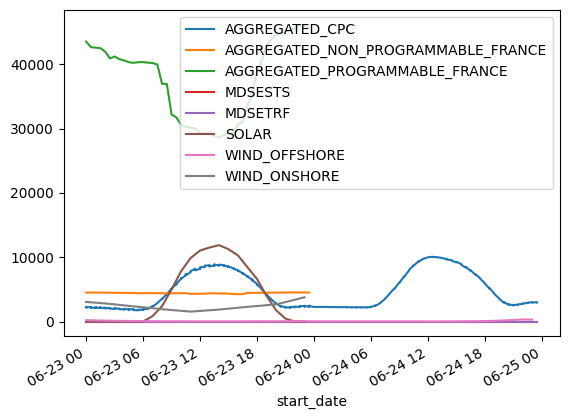

In [98]:
solar.groupby("production_type")["value"].plot(legend=True)